# Exploring Regression

UCI Machine Learning: Abalone Dataset

https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/

```
abalone.data
```
contains the data points themselves.

```
abalone.names
```
contains the legend for how to go about interpreting the data

Research Resources: 

1. https://thedatascientist.com/top-4-regression-algorithms-in-scikit-learn/




Dependencies:

- pandas
- numpy
- seaborn
- matplotlib.pyplot
- warnings
- scikit-learn
- statsmodels.api

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [3]:
# ignoring warnings for plt
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv("abalone.data",header=None)

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [6]:
# transforming columns into names from abalone.names
df.columns = pd.Index(["Sex","Length","Diameter","Height","Whole_Weight","Shucked_Weight","Viscera_Weight","Shell_Weight","Rings"])

In [7]:
df.head()

,Sex,Length,Diameter,Height,Whole_Weight,Shucked_Weight,Viscera_Weight,Shell_Weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [8]:
# replacing 'M' ~ 'Male' | 'F' ~ 'Female' | 'I' ~ 'Infant' in 'Sex' column
df["Sex"] = df["Sex"].replace({"M":"Male", "F":"Female", "I":"Infant"})

In [9]:
df.head()

,Sex,Length,Diameter,Height,Whole_Weight,Shucked_Weight,Viscera_Weight,Shell_Weight,Rings
0,Male,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,Male,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,Female,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,Male,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,Infant,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


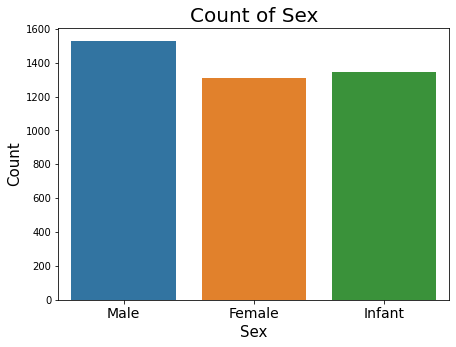

In [10]:
# plotting count of sex's 
fig, ax = plt.subplots(figsize=(7,5))
_ = sns.countplot(df["Sex"])
plt.title("Count of Sex",fontsize=20)
plt.ylabel("Count",fontsize=15)
plt.xlabel("Sex",fontsize=15)
plt.xticks(fontsize=14)
_ = plt.show()

In [11]:
df.head()

,Sex,Length,Diameter,Height,Whole_Weight,Shucked_Weight,Viscera_Weight,Shell_Weight,Rings
0,Male,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,Male,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,Female,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,Male,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,Infant,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [12]:
# finding the average height for males, females, infants (mm)
df.groupby("Sex")["Height"].mean()

Sex
Female    0.158011
Infant    0.107996
Male      0.151381
Name: Height, dtype: float64

In [13]:
# finding average Whole weight for males, females, infants (lb)
df.groupby("Sex")["Whole_Weight"].mean()

Sex
Female    1.046532
Infant    0.431363
Male      0.991459
Name: Whole_Weight, dtype: float64

In [14]:
# function to show distribution of metric for all sexes
def stack_dis_by(metric: str, frame: 'dataframe', kind="kde", title="", size=(12,9)):
  g = sns.displot(frame, x=metric, kind=kind, hue="Sex", multiple="stack")
  plt.title(title)
  g.set_axis_labels(metric, "Density")
  sns.set(rc={"figure.figsize": size})

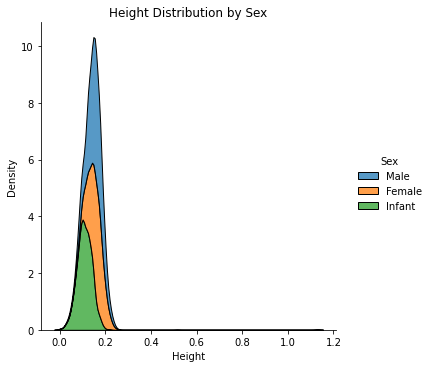

In [15]:
# visualizing distribution with respect to height for all sexes
stack_dis_by(metric="Height", frame=df, title="Height Distribution by Sex")

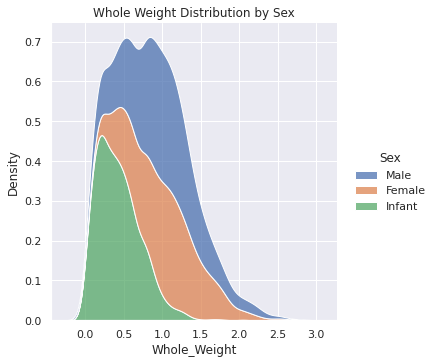

In [16]:
# visualizing distribution with respect to Whole Weight for all sexes
stack_dis_by(metric="Whole_Weight", frame=df, title="Whole Weight Distribution by Sex")

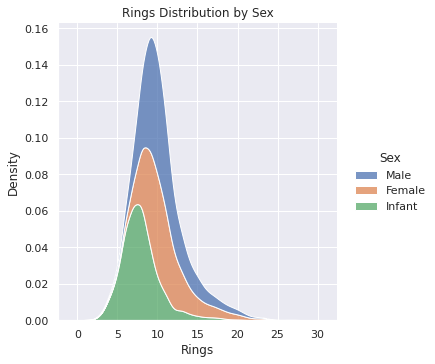

In [17]:
# visualizing distribution with respect to Rings for all sexes
stack_dis_by(metric="Rings", frame=df, title="Rings Distribution by Sex")

Part 1: Regression

* I will try to predict the number of Rings on an abalone

In [18]:
# computing correlation matrix
df.corr()

,Length,Diameter,Height,Whole_Weight,Shucked_Weight,Viscera_Weight,Shell_Weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole_Weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked_Weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera_Weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell_Weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


In [19]:
# encoding sex
sexs = "Male,Female,Infant".split(",")
df = df.replace({s:i for i,s in enumerate(sexs)})

In [20]:
# y ~ "Rings" | X ~ rest
X = df.drop("Rings",axis=1)
y = df["Rings"]

In [21]:
import statsmodels.api as sms

X2 = sms.add_constant(X)
est = sms.OLS(y, X2).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                  Rings   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     600.3
Date:                Tue, 17 Jan 2023   Prob (F-statistic):               0.00
Time:                        21:12:04   Log-Likelihood:                -9215.6
No. Observations:                4177   AIC:                         1.845e+04
Df Residuals:                    4168   BIC:                         1.851e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              3.7593      0.283     13.

In [22]:
# measuring multi-collinearity with variance inflation factor (VIF)
# doing so to detect and reason about handling features too correlated to the target

from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif_calc(frame: 'dataframe') -> 'dataframe':
  vif_df = pd.DataFrame({
      "Feature": frame.columns,
      "VIF": [variance_inflation_factor(frame.values,i) for i in range(len(frame.columns))]
  })
  return vif_df

In [23]:
vif_df = vif_calc(X)
vif_df

,Feature,VIF
0,Sex,2.682127
1,Length,719.817749
2,Diameter,752.844073
3,Height,42.118898
4,Whole_Weight,422.411121
5,Shucked_Weight,101.614374
6,Viscera_Weight,63.677159
7,Shell_Weight,81.901274


We can see there's high collinearity with nearly every feature aside from 'Sex'. 

All of the weight metrics appear to be the most correlated. Which makes sense because the sum of all the weights (shucked, viscera, and shell) are the 'Whole_Weight'. We'll use multiple configurations of columns in use via OLS 

The base model results were poor. R^2 is just above random guessing. 

Let's see if dropping the weight features that were highly correlated increases R^2 and decreases MSE.

In [24]:
vif_df

,Feature,VIF
0,Sex,2.682127
1,Length,719.817749
2,Diameter,752.844073
3,Height,42.118898
4,Whole_Weight,422.411121
5,Shucked_Weight,101.614374
6,Viscera_Weight,63.677159
7,Shell_Weight,81.901274


In [25]:
# re-running OLS on various configurations w/o certain columns
def exhaustive_ols(): 
  cols = [c for c in X.columns]
  configs = [cols[:i] for i in range(len(cols))]
  for config in configs:
    temp = X.drop(config,axis=1)
    X2 = sms.add_constant(temp)
    est = sms.OLS(y,X2).fit()
    print("")
    print(f"Dropped: {config}\n")
    print(f"Used: {list(set(cols)-set(config))}\n")
    print(est.summary())
    print("")
exhaustive_ols()


Dropped: []

Used: ['Whole_Weight', 'Shell_Weight', 'Diameter', 'Sex', 'Height', 'Length', 'Viscera_Weight', 'Shucked_Weight']

                            OLS Regression Results                            
Dep. Variable:                  Rings   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     600.3
Date:                Tue, 17 Jan 2023   Prob (F-statistic):               0.00
Time:                        21:12:05   Log-Likelihood:                -9215.6
No. Observations:                4177   AIC:                         1.845e+04
Df Residuals:                    4168   BIC:                         1.851e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975

As expected, the highest R^2 belongs to the configuration with the least dropped columns, e.g. when trying to predict 'Rings' and all of the features are used to predict it. Adding more variables improves R^2.



### Review of OLS

With ordinary least squares regression, the more variables added into the regression as predictors for the target, the higher the R^2  it appears. Empirically, this is true. However, including all of the variables could lead to problems such as multicollinearity, which would go against the purpose of the predictors being 'independent'. A sway in a single value could sway other values drastically. The variance inflation factor (VIF) can be used as a tool to detect those features that are too correlated. 

Through experimentation dropping those features one by one and re-running OLS, we saw that generally, when the model was given the most variables, the least amount of 'dropped' variables, it performed best. This is a tricky balancing problem common to a lot of data analysis tasks.

In general the scores for R^2 for predicing the "Rings" column were not very good, the highest score was roughly 53.5%, a tad above random guessing. This could be adjusted using a different model for regression which I will explore next. Will other machine learning models perform better in regression for predicting the rings of the abalone?



### Take Away

One big take away with this experiment is that the variance inflation factor (VIF) showed that there were many highly correlated terms. This is known as multicollinearity and it can be a problem because it essentially voids the nature of 'independent' variables. If the change in one of those variables, changes the values of other variables, then its not exactly independent in nature. 

So, trying to reduce the multicollinearity is what was attempted in the exhaustive ordinary least squares approach I took. Because pretty much all of the variables suffered from it, exhausting the technique, keeping & dropping subsequent stretches of variables made sense to see how performance would adjust. 

But there are other ways to perform regression and incur some kind of loss / penalty regularization term so that those variables that are highly correlated and those that are insignificant to the prediction task can have their weight reduced so that they make less impact overall. 

#### Lasso Regression

- Lasso Regression could help as it implements an L1 regularization term to reduce the weightage of those unrelated variables, so that they have less impact to the overall prediction task. L1 does not prevent the removal of a variable though.

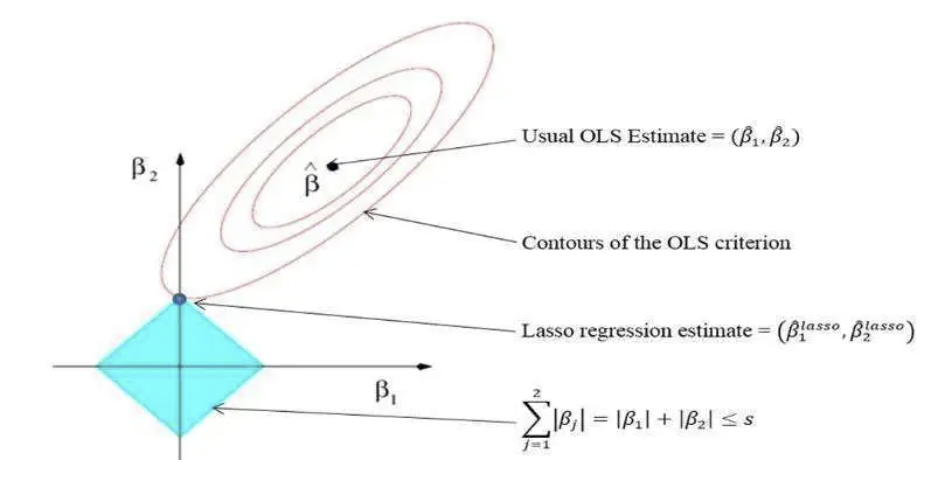

#### Ridge Regression

- Ridge Regression like Lasso integrates a regularization term, but it's L2. L2 regularization attempts to minimize multicollinearity by reducing the weightage of multicollinear features in the training phase without having to remove them entirely.

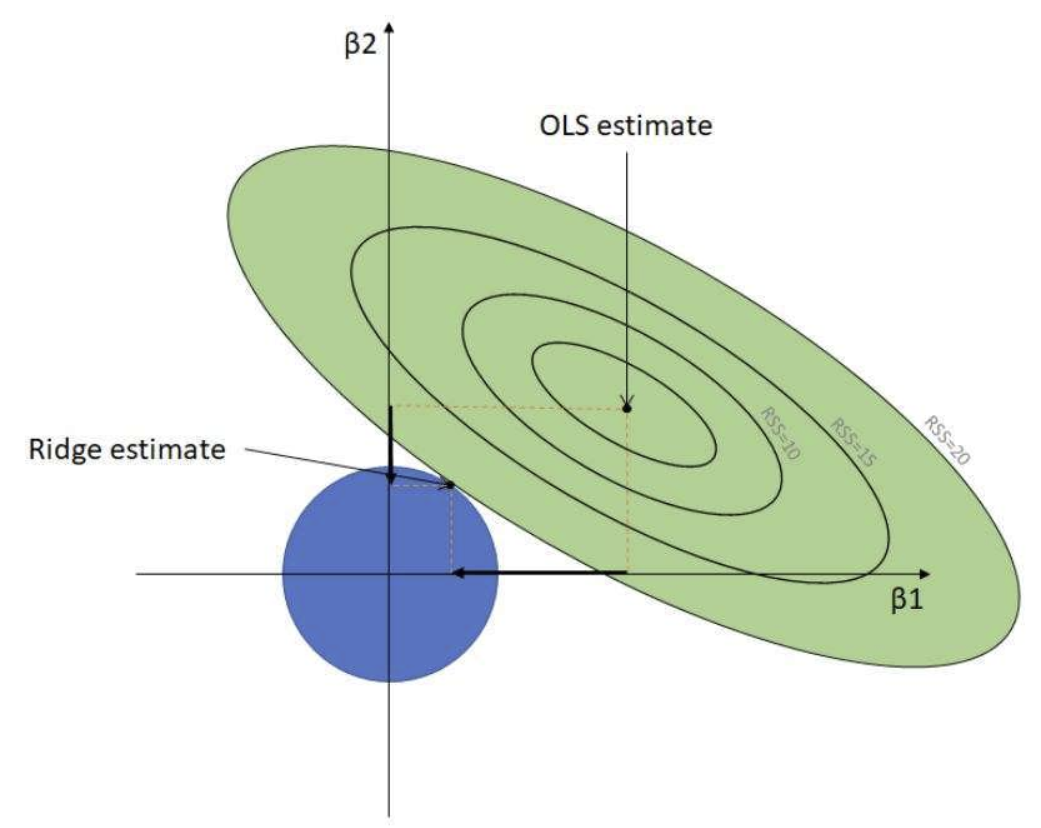

#### ElasticNet Regression

- Combines L1 and L2 regularization terms, the strategies of Lasso and Ridge, together so that insignificant variables to the predicting task have their weights minimized and multicollinear feature weights are minimized, in the training phase, improving model performance.

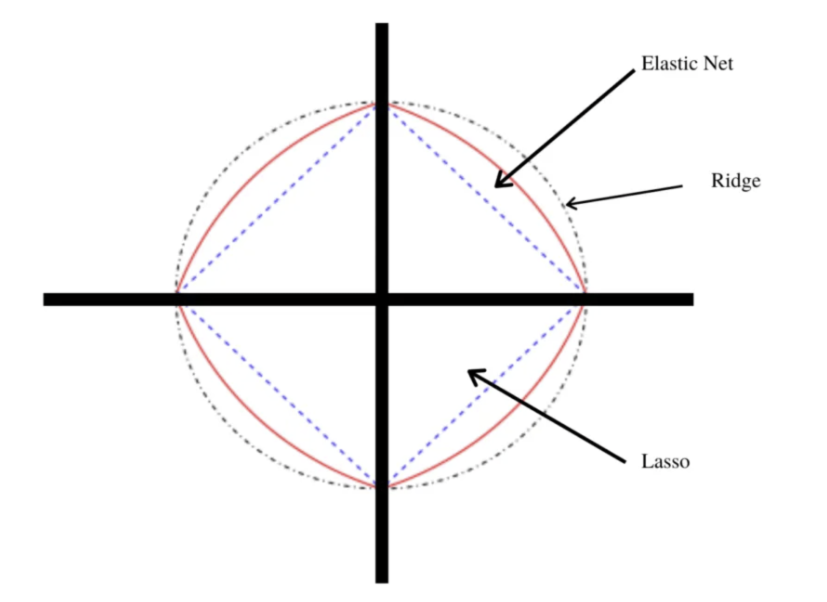







#### Resource: https://thedatascientist.com/top-4-regression-algorithms-in-scikit-learn/

In [36]:
# Ridge Regression

from sklearn.linear_model import Ridge 
from sklearn.model_selection import GridSearchCV

params = {"alpha": np.linspace(0,1,30)}
scoring = ['r2','neg_mean_squared_error']
model = Ridge()
reg = GridSearchCV(model, params, scoring=scoring, refit=scoring[0],cv=5)
reg.fit(X,y)
print(reg.best_estimator_)

Ridge()


In [37]:
# Ridge Regression
model = Ridge()
model.fit(X,y)
model.score(X,y)

0.5328435087441626

In [39]:
# Lasso regression

from sklearn.linear_model import Lasso

params = {"alpha": np.linspace(0,1,30)}
scoring = ["r2","neg_mean_squared_error"]
model = Lasso()
reg = GridSearchCV(model, params, scoring=scoring, refit=scoring[0], cv=5)
reg.fit(X,y)
print(reg.best_estimator_)

Lasso(alpha=0.0)


In [41]:
# Lasso regression 

model = Lasso(alpha=0.0)
model.fit(X,y)
model.score(X,y)

0.5353445764938617

In [42]:
# ElasticNet regression

from sklearn.linear_model import ElasticNet

params = {"alpha": np.linspace(0,1,30), "l1_ratio": np.linspace(0,1,30)}
scoring = ["r2","neg_mean_squared_error"]
model = ElasticNet()
reg = GridSearchCV(model, params, scoring=scoring, refit=scoring[0], cv=5)
reg.fit(X,y)
print(reg.best_estimator_)

ElasticNet(alpha=0.0, l1_ratio=0.0)


In [43]:
# ElasticNet regression

model = ElasticNet(alpha=0.0, l1_ratio=0.0)
model.fit(X,y)
model.score(X,y)

0.5353445764938617

# Conclusion

There was little to any improvment in the regression model testing Lasso, Ridge, and ElasticNet relative to OLS performance. 

As found with OLS, the regression model with the most variables used to predict 'Rings', yielded the highest r^2 roughly 53.5%; the change to Ridge and ElasticNet, the combination of Lasso and Ridge, did little to no improvement to this score even with hyperparameter tuning and cross validation testing multiple combinations. 

While I cannot say for sure this will always be the case, as it depends on the data, I can say that it appears running regression to predict 'Rings' in the dataset does seem to be difficult. The multicollinearity in this dataset with respect to the prediction task presents challenges. Even with the penalization terms of Ridge or Lasso loss functions, R^2 can only be slightly improved. 
